# Overview

DATA : stress ratings

CODE : analyze & visualize

APPLY : behavioral, fMRI

# Imports

In [14]:
import pandas; import os; import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib notebook
import hypertools; import seaborn as sb; 

In [15]:
%matplotlib notebook
mpl.get_backend() 

'nbAgg'

# Compile data

In [41]:
data = pd.read_csv('cleaned_behavioral.csv')

# Check it out ...

In [51]:
data 

,Unnamed: 0,Unnamed: 0.1,sID,accession,qID,question,response,order,trial
0,0,0,1548,3001,"1,1",Walking around Occom Pond,1,1,1
1,1,1,1548,3001,"1,2",Getting your dream job,2,1,2
2,2,2,1548,3001,"1,3",Being rejected by your dream job,4,1,3
3,3,3,1548,3001,"1,4",Summer Break,1,1,4
4,4,4,1548,3001,"1,5",Interviewing for internships,3,1,5
...,...,...,...,...,...,...,...,...,...
2245,2245,2245,747,3042,"3,71",Studying in the library,0,3,71
2246,2246,2246,747,3042,"3,72",Winter Carnival,0,3,72
2247,2247,2247,747,3042,"3,73",Homecoming,0,3,73
2248,2248,2248,747,3042,"3,74",Getting a text from your ex,0,3,74


In [44]:
#data.to_csv('data_clean.csv')

# Let's make some plots, eh?

# Initial Look

### Some subjects have higher / lower average stress scores

<IPython.core.display.Javascript object>


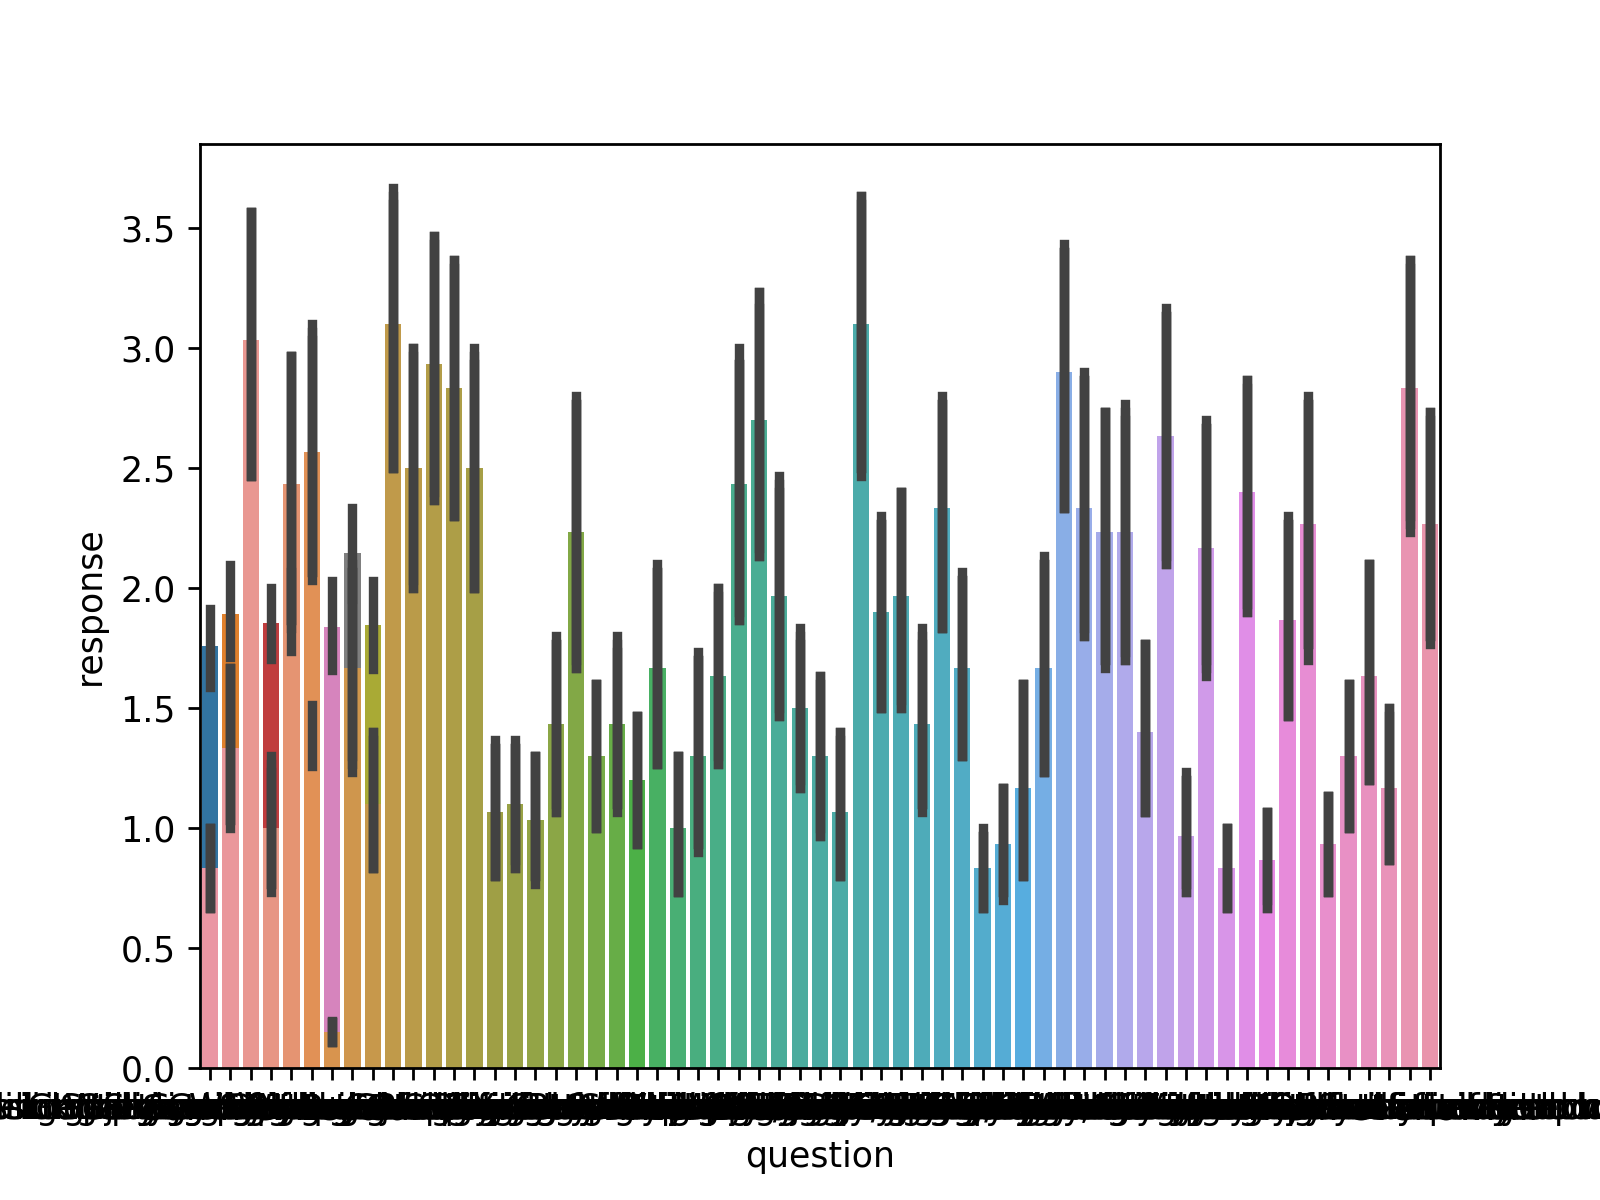

In [47]:
sb.barplot(x='sID', y='response', data=data)

### Some questions also yield higher / lower average scores

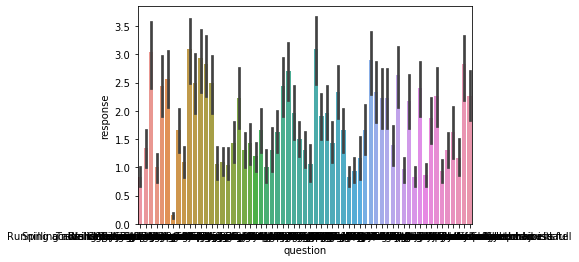

In [56]:
%matplotlib inline

sb.barplot(x='question', y='response', data=data)
plt.show()

# STUDENT QUESTIONS

# QUESTION 1: 

## Do people get less stressed over time / acclimate to the stressors ? 

### Sure doesn't look like it.. ;)

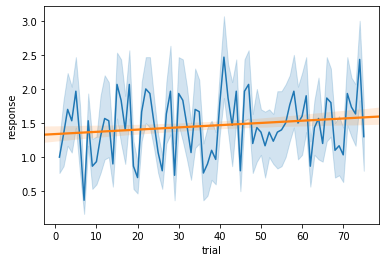

In [58]:
sb.lineplot(x='trial', y='response', data=data)
sb.regplot('trial', 'response', data=data, x_ci='ci', scatter=False, fit_reg=True, marker='o')



### Gosh, that grey line looks interesting...

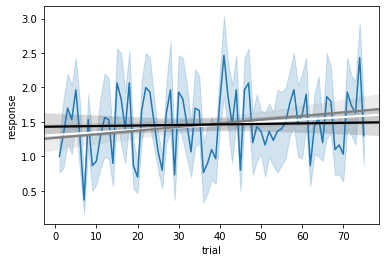

In [61]:
sb.lineplot(x='trial', y='response', data=data)

for order,color in zip(data['order'].unique(),['white','grey','black']):
    sb.regplot('trial', 'response', data=data[data['order']==order], x_ci='ci', scatter=False, fit_reg=True,  color=color, marker='o')


In [62]:
# Question for students: what kind of stats will we want for the above trendline(s)?

# Are there other things you might want to look at or explore here?

### Other things to think about

We can also reduce and plot high dimensional data (like fMRI) over time.... Hmm


In [26]:
from IPython.display import Image
Image(url='https://hypertools.readthedocs.io/en/latest/_images/hypertools.gif')  

# QUESTION 2:

## Are the stressors unique or different from each other?

In [67]:
data['question'].unique()

array(['Walking around Occom Pond', 'Getting your dream job',
       'Being rejected by your dream job', 'Summer Break',
       'Interviewing for internships', 'Spilling a drink on a stranger',
       '+', 'Traveling to campus at the beginning of the term',
       'Winter Carnival', 'Getting a failing grade on a midterm',
       'Running across campus to get to a class you are already 5 minutes late for',
       "Spilling a drink on your laptop which hasn't been backed up in a month",
       'Walking into an interview for your dream job',
       'Not getting an internship',
       'Getting a perfect grade on a midterm', 'Spring Break',
       'Getting a text from your best friend', 'Commencement speech',
       'Seeing your ex at a party', 'Green Key',
       "Waiting at Murphy's to meet a pledge who is late",
       'Sending an email to your friend that is only half finished',
       'Saying goodbye to someone then walking in the same direction',
       'Playing frisbee on the green',

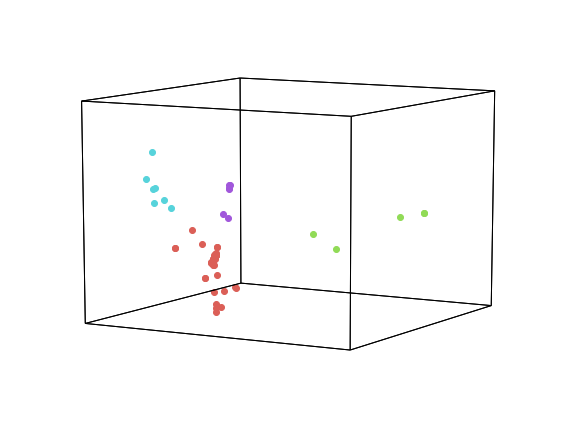

In [68]:
# see how questions cluster, based on content ! 

# text vectorized (scikit-learn CountVectorizer) --> estimate topics (LatentDirichletAllocation)

labels = data['question'].unique()[:-1]
geo    = hypertools.plot(data['question'].unique()[:-1], 'o', size=[8, 6], n_clusters=4) 

In [69]:
labels = hypertools.cluster(data['question'].unique()[:-1], n_clusters=4) 
dictionary = {'questions':data['question'].unique()[:-1], 'labels':labels}
df = pd.DataFrame(dictionary)

df[df['labels']==3]

# look at the different clusters of questions...
# do they appear to have anything in common?

# what happens if we use more or fewer clusters? 

,questions,labels
7,Traveling to campus at the beginning of the term,3
10,Running across campus to get to a class you ar...,3
22,Saying goodbye to someone then walking in the ...,3
34,Leaving for study abroad,3
37,Studying in the library,3
54,Studying for a midterm,3
57,Coming back from study abroad,3


In [70]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sID', 'accession', 'qID', 'question',
       'response', 'order', 'trial'],
      dtype='object')

In [71]:
cluster_button = data.groupby(['question'], as_index=False).mean()

In [72]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sID', 'accession', 'qID', 'question',
       'response', 'order', 'trial'],
      dtype='object')

In [73]:
# data['Response.1']

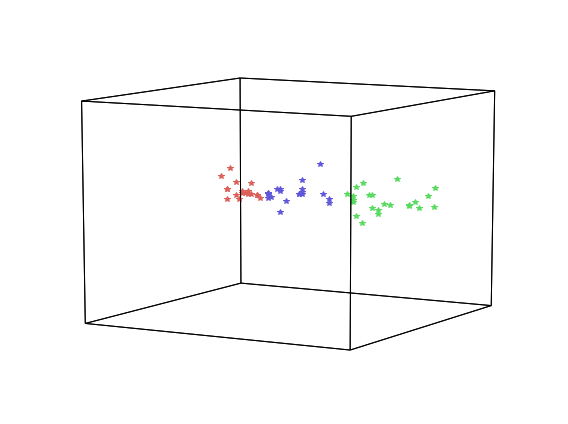

These questions were clustered together: 
Series([], Name: questions, dtype: object)
These questions were clustered together: 
Series([], Name: questions, dtype: object)
These questions were clustered together: 
Series([], Name: questions, dtype: object)


In [93]:
# how many clusters do you want?
n = 3

# make the plot
geo    = hypertools.plot(cluster_button[['question', 'response']], '*', size=[8, 6], n_clusters=n) 
labels = hypertools.cluster(cluster_button[['question', 'response']], n_clusters=n) 
plt.show()

# look at how the questionis cluster together
dictionary = {'questions':cluster_button['question'].unique(), 'labels':labels}
df = pd.DataFrame(dictionary)

for c in range(n):
    print('These questions were clustered together: ')
    print(1625)

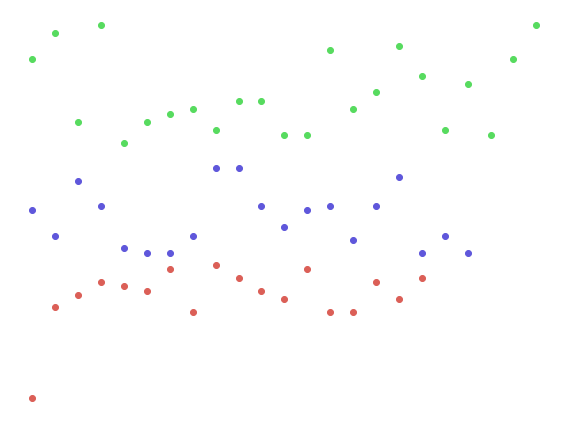

In [84]:
# set n to the number of clusters you want
n = 3

geo    = hypertools.plot(cluster_button[['response']], 'o', size=[8, 6], n_clusters=n) 
labels = hypertools.cluster(cluster_button[['response']], n_clusters=n) 
plt.show()

k = [i for i, e in enumerate(labels) if e == 4]

for a in k:
    print(cluster_button['question'][a])


Question for students: If I cluster the questions by the scores students give them, how will that relate to the structure of the Order 3 stimulus set

In [36]:
# Determining the number of clusters

In [37]:
# helpful resource here :
# https://learn.scientificprogramming.io/python-k-means-data-clustering-and-finding-of-the-best-k-485f66297c06

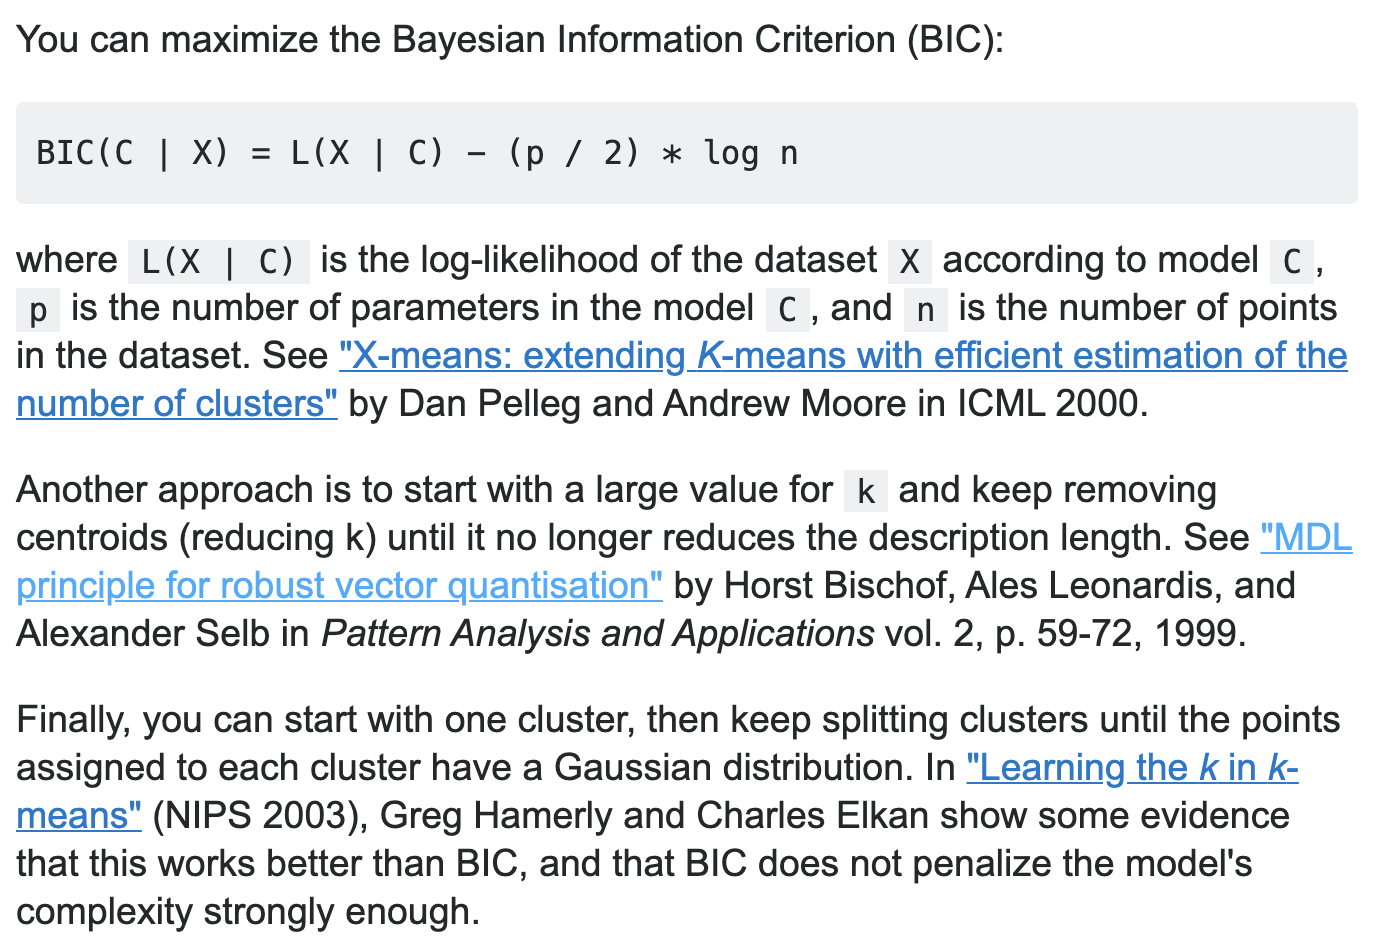

In [38]:
from IPython.display import Image
Image("screenshot.png")

# QUESTION 3: 

## Does stress from one stimulus influence the response to the next? 

## Does some stress "carry over"?

In [39]:
# Question for students: what are different ways we might look at this?

In [32]:
# Question for students: what other thigns might we want to look at / visualize / think about?